# Major Project : Predictive Analysis & Customer Segmentation for a E-Commerce Project

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-retail-ecommerce-dataset/data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv('/kaggle/input/online-retail-ecommerce-dataset/data.csv',encoding='ISO-8859-1')

In [4]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
277749,561192,23029,DRAWER KNOB CRACKLE GLAZE GREEN,6,7/25/2011 13:45,1.65,16033.0,United Kingdom
133887,547803,22921,HERB MARKER CHIVES,12,3/25/2011 13:23,0.65,13662.0,United Kingdom
204648,554682,21165,BEWARE OF THE CAT METAL SIGN,3,5/25/2011 16:08,1.69,14085.0,United Kingdom
69541,541971,90214B,"LETTER ""B"" BLING KEY RING",1,1/24/2011 13:48,0.83,NaN,United Kingdom
162315,550500,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,6,4/18/2011 15:26,2.46,NaN,United Kingdom
196206,553831,82484,WOOD BLACK BOARD ANT WHITE FINISH,6,5/19/2011 11:36,7.95,14442.0,Channel Islands
187239,552956,23155,KNICKERBOCKERGLORY MAGNET ASSORTED,12,5/12/2011 12:34,0.83,12431.0,Australia
126017,547063,22729,ALARM CLOCK BAKELIKE ORANGE,1,3/20/2011 13:33,3.75,14769.0,United Kingdom
402427,571498,22147,FELTCRAFT BUTTERFLY HEARTS,2,10/17/2011 15:06,1.45,17841.0,United Kingdom
526679,580675,21877,HOME SWEET HOME MUG,12,12/5/2011 14:35,1.65,15640.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


> **The Quantity and Unit price can't be practically be negative, so lets drop the negative values**

In [8]:
df=df[df['Quantity']>0]
df=df[df['UnitPrice']>0]

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [10]:
df['Description'].nunique()

4026

In [11]:
df['StockCode'].nunique()

3922

In [12]:
df.groupby('Description')['StockCode'].nunique().sort_values(ascending=False)

Description
METAL SIGN,CUPCAKE SINGLE HOOK         6
PINK FAIRY CAKE CHILDRENS APRON        2
CHOCOLATE 3 WICK MORRIS BOX CANDLE     2
SET OF 4 POLKADOT COASTERS             2
SET OF 4 POLKADOT PLACEMATS            2
                                      ..
FRESHWATER PEARL BRACELET GOLD         1
FRESHWATER PEARL BRACELET IVORY        1
FRIDGE MAGNETS LA VIE EN ROSE          1
FRIDGE MAGNETS LES ENFANTS ASSORTED    1
ZINC WIRE SWEETHEART LETTER TRAY       1
Name: StockCode, Length: 4026, dtype: int64

In [13]:

#for stockcode in df['StockCode'].unique():
 #   stockcode_f=df[df['StockCode']==stockcode]['Description'].unique()[0]
  #  df.loc[df['StockCode']==stockcode,'Description']=stockcode_f

In [14]:
#for description in df['Description'].unique():
 #   if df[df['Description']==description]['StockCode'].nunique()>1:
  #      stockcode_f=df[df['Description']==description]['StockCode'].unique()[0]
   #     df.loc[df['Description']==description,'StockCode']=stockcode_f

# Checking for Duplicates

In [15]:
df[df.duplicated(subset=['InvoiceNo','StockCode','InvoiceDate'],keep='last')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
113,536381,71270,PHOTO CLIP LINE,1,12/1/2010 9:41,1.25,15311.0,United Kingdom
483,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,3,12/1/2010 11:45,6.35,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
491,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541656,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541659,581538,22899,CHILDREN'S APRON DOLLY GIRL,2,12/9/2011 11:34,2.10,14446.0,United Kingdom
541666,581538,23343,JUMBO BAG VINTAGE CHRISTMAS,1,12/9/2011 11:34,2.08,14446.0,United Kingdom
541674,581538,35004B,SET OF 3 BLACK FLYING DUCKS,2,12/9/2011 11:34,5.45,14446.0,United Kingdom


In [16]:
df[(df['InvoiceNo']=='581538') & (df['StockCode']=='21194')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541684,581538,21194,PINK HONEYCOMB PAPER FAN,2,12/9/2011 11:34,0.65,14446.0,United Kingdom
541697,581538,21194,PINK HONEYCOMB PAPER FAN,1,12/9/2011 11:34,0.65,14446.0,United Kingdom


Lets Remove The duplicates

In [17]:
i=df[df.duplicated(subset=['InvoiceNo','StockCode','InvoiceDate'],keep='last')].index
df.drop(i,inplace=True)

In [18]:
df=df[~df['CustomerID'].isnull()]
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Adding Extra Columns to infer more information

In [19]:
data=df.copy()

In [20]:
# GROSS ORDER VALUE
data['GOV']=data['Quantity']*data['UnitPrice']

data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [21]:
#year
data['Year']=data['InvoiceDate'].dt.year
#data['Month']=data['InvoiceDate'].dt.month
data['DateYM']=data['InvoiceDate'].dt.to_period('M')
data['Day of the week']=data['InvoiceDate'].dt.dayofweek


In [22]:
data.sample(4)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GOV,Year,DateYM,Day of the week
403244,571556,23204,CHARLOTTE BAG APPLES DESIGN,10,2011-10-18 09:24:00,0.85,12662.0,Germany,8.50,2011,2011-10,1
49861,540536,22676,FRENCH BLUE METAL DOOR SIGN 1,3,2011-01-09 14:21:00,1.25,17757.0,United Kingdom,3.75,2011,2011-01,6
456283,575682,21479,WHITE SKULL HOT WATER BOTTLE,4,2011-11-10 15:37:00,4.25,12826.0,United Kingdom,17.00,2011,2011-11,3
133288,547772,22063,CERAMIC BOWL WITH STRAWBERRY DESIGN,1,2011-03-25 11:34:00,2.95,17979.0,United Kingdom,2.95,2011,2011-03,4


In [23]:
data.describe()

,Quantity,UnitPrice,CustomerID,GOV,Year,Day of the week
count,387846.000000,387846.000000,387846.000000,387846.000000,387846.000000,387846.00000
mean,13.233304,3.120177,15282.105372,22.813690,2010.934755,2.60087
std,181.603506,21.089883,1713.853807,312.923031,0.246958,1.91982
min,1.000000,0.001000,12346.000000,0.001000,2010.000000,0.00000
25%,2.000000,1.250000,13941.000000,4.950000,2011.000000,1.00000
50%,6.000000,1.950000,15145.000000,12.500000,2011.000000,2.00000
75%,12.000000,3.750000,16790.000000,19.800000,2011.000000,4.00000
max,80995.000000,8142.750000,18287.000000,168469.600000,2011.000000,6.00000


<Axes: ylabel='GOV'>

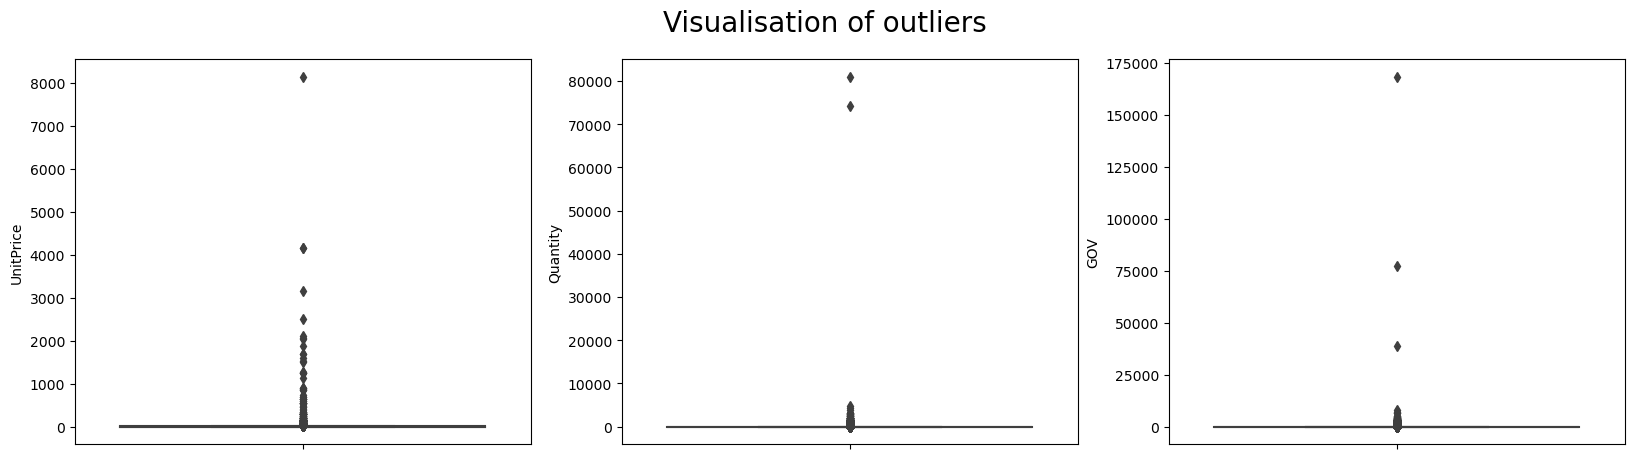

In [24]:
fig = plt.figure(figsize = (20,5))
fig.suptitle("Visualisation of outliers",size=20)

axes = fig.add_subplot(1, 3, 1)
sns.boxplot(data=data,y="UnitPrice")

axes = fig.add_subplot(1, 3, 2)
sns.boxplot(data=data,y="Quantity")

axes = fig.add_subplot(1, 3, 3)
sns.boxplot(data=data,y="GOV")

In [25]:
from scipy import stats
data= data[(np.abs(stats.zscore(data[["GOV"]])) < 2).all(axis=1)]

#  Exploratory Data Analysis
> 

> Sales are at it's peak during **September, October & November** of 2011

Text(0.5, 1.0, 'Sale Trend')

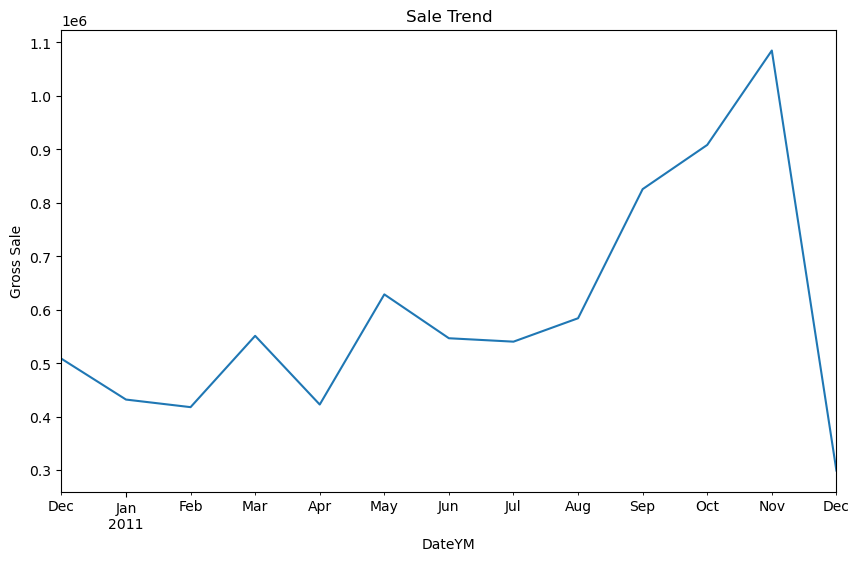

In [26]:
plt.figure(figsize=(10,6))
data.groupby('DateYM')['GOV'].sum().plot()
plt.ylabel('Gross Sale')
plt.title('Sale Trend')

In [27]:
grouped=data.groupby('Day of the week').agg({'GOV':'sum','InvoiceNo':'nunique'})
grouped=grouped.reset_index().rename(columns={'GOV':'Gross_Sales_day','InvoiceNo':'Total Order/day'})
#grouped.loc[len(grouped)]=[5,0,0]
#grouped=grouped.sort_values(by='Day of the week')

In [28]:
grouped

,Day of the week,Gross_Sales_day,Total Order/day
0,0,1240080.051,2843
1,1,1372635.541,3151
2,2,1472591.110,3431
3,3,1730898.590,4007
4,4,1171020.201,2803
5,6,763003.141,2168


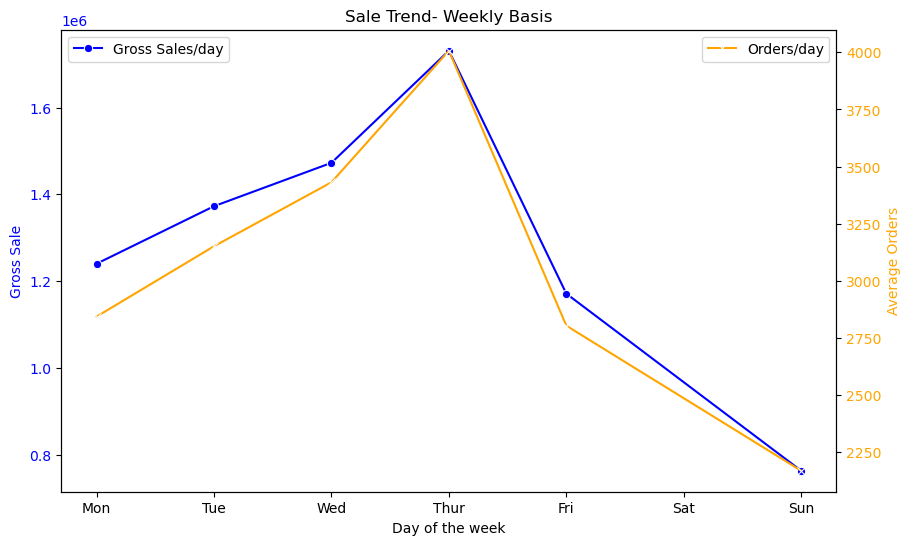

In [29]:
plt.figure(figsize=(10,6))
#ax=data.groupby('Day of the week')['GOV'].sum().plot(color='r',marker='o',label='Gross Sale')
ax1=sns.lineplot(data=grouped,x='Day of the week',y='Gross_Sales_day',marker='o',color='b')
ax1.legend(['Gross Sales/day' ],loc='upper left')
plt.ylabel('Gross Sale',color='b')
plt.title('Sale Trend- Weekly Basis')
ax1.tick_params(axis='y', labelcolor='b')

ax2=ax1.twinx()
sns.lineplot(data=grouped,x='Day of the week',y='Total Order/day',ax=ax2,marker='x',color='orange',label='Orders/day')
ax2.legend(loc='upper right')
#ax2.set_yticks([4,8,12,16,20,24,28,32,36])
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylabel('Average Orders',color='orange')
ax1.set_xticks(ticks=[0,1,2,3,4,5,6],labels=['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
#ax2.set_xticks(ticks=[0,1,2,3,4,5,6],labels=['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])


> **The sales are highest on the Wednesday**
> > Saturday is holiday as there no orders recieved 

In [30]:
grouped=data.groupby('Country').agg({'GOV':'sum'}).reset_index().rename(columns={'GOV':'Gross sales'}).sort_values(by='Gross sales',ascending=False).head(10)

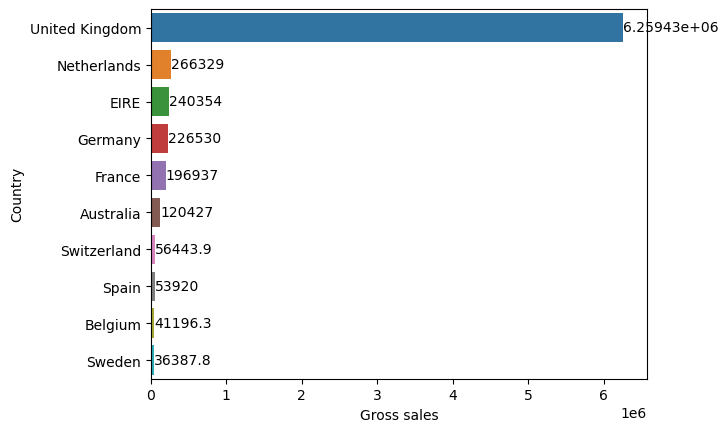

In [31]:
ax=sns.barplot(grouped,x='Gross sales',y='Country')

for i in ax.containers:
    ax.bar_label(i,)

In [32]:
group=pd.DataFrame(data.groupby(['Country','Description'])['GOV'].sum())
best=pd.DataFrame(group.groupby('Country')['GOV'].idxmax().values.tolist(),columns=['Country','Product'])
best['sales']=group.groupby('Country')['GOV'].max().values.tolist()
best['total sales']=group.groupby('Country')['GOV'].sum().values.tolist()
best=best.sort_values(by='total sales',ascending=False).head(5)
best['% of total sales']=best['sales']/best['total sales']

best.style.background_gradient(cmap=sns.light_palette("seagreen", as_cmap=True), subset=["% of total sales"])

,Country,Product,sales,total sales,% of total sales
35,United Kingdom,REGENCY CAKESTAND 3 TIER,86318.650000,6259432.974000,0.013790
23,Netherlands,ROUND SNACK BOXES SET OF4 WOODLAND,7991.400000,266328.580000,0.030006
10,EIRE,REGENCY CAKESTAND 3 TIER,5410.350000,240353.870000,0.022510
14,Germany,POSTAGE,21001.000000,226530.370000,0.092707
13,France,POSTAGE,15454.000000,196936.880000,0.078472


In [33]:
data.reset_index()
number_customers = data.groupby('DateYM')["CustomerID"].nunique()
number_customers = pd.DataFrame(data=number_customers).reset_index()


number_new_customers = []
customers_seen = []
for month in data['DateYM'].unique():
    customers = data[data["DateYM"] == month].CustomerID.unique()
    count=0
    for customer in customers:
        if customer not in customers_seen:
            count+=1
            customers_seen.append(customer)
    number_new_customers.append((month,count))
number_new_customers = pd.DataFrame(number_new_customers,columns=["Date","New customers"])
number_new_customers.Date = number_new_customers.Date.dt.to_timestamp()

In [34]:
dates=[pd.to_datetime("2010-12",format=("%Y-%m"))]
dates+=[pd.to_datetime("2011-"+str(month),format="%Y-%m") for month in range(1,13)]
number_customers['DateYM']=number_new_customers['Date']


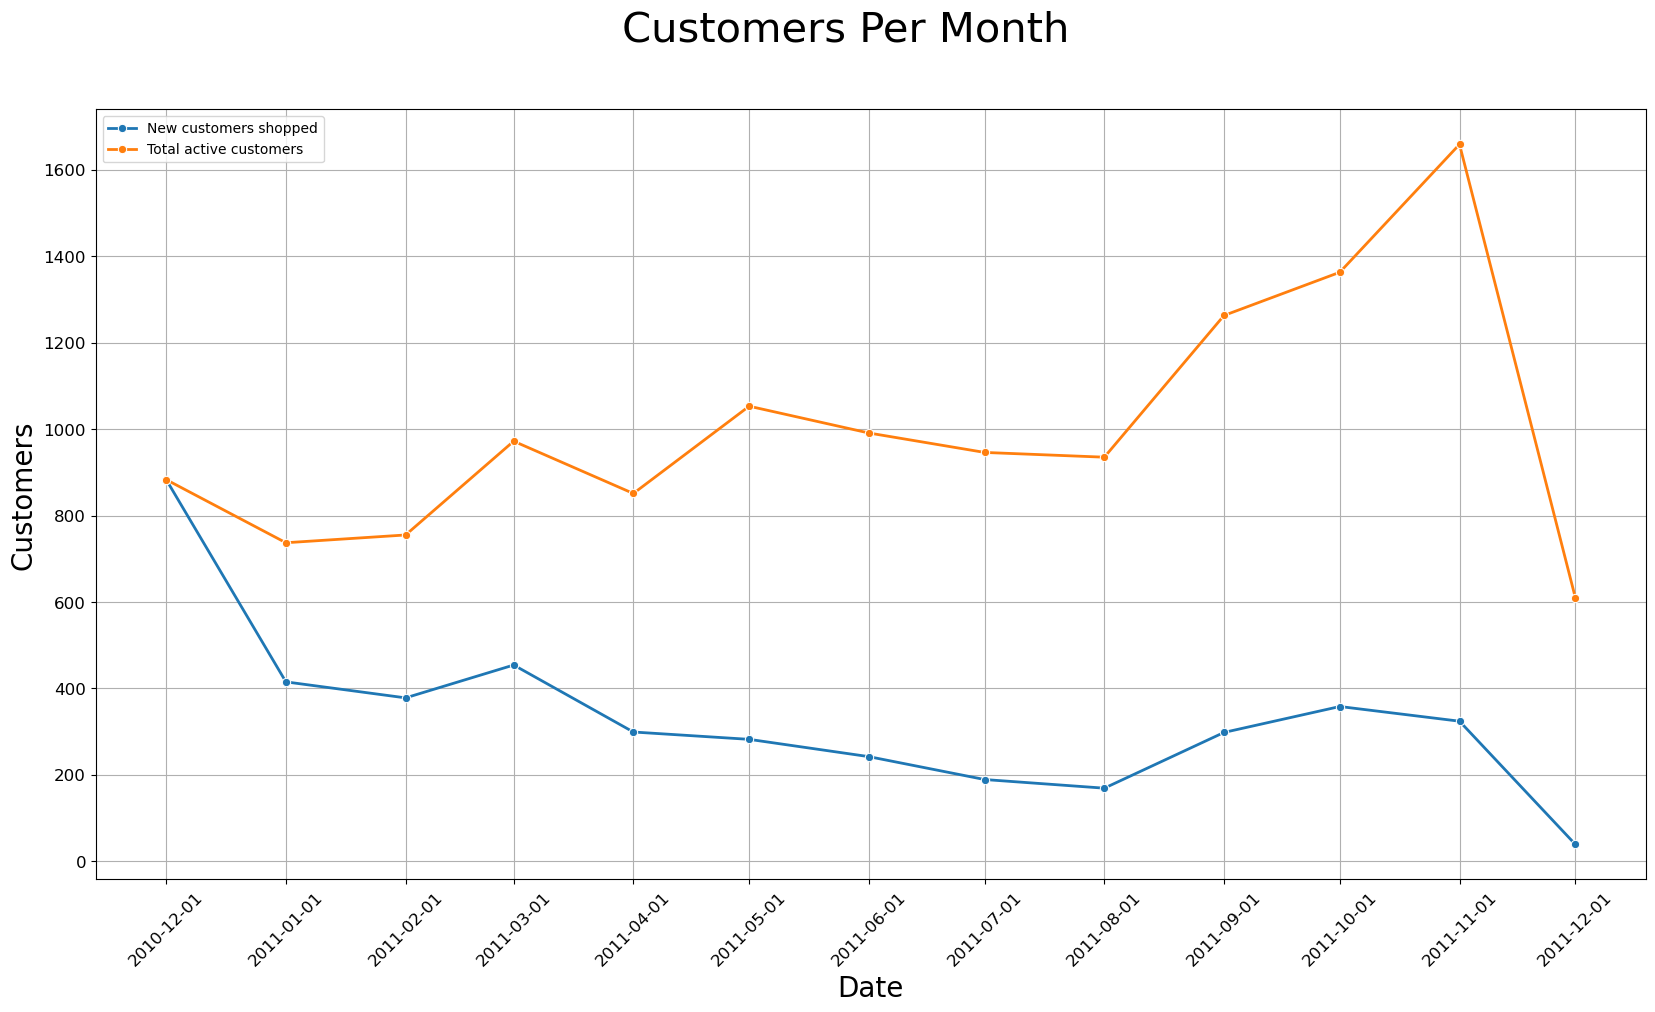

In [35]:
fig  = plt.figure(figsize = (20,10)).suptitle('Customers Per Month', fontsize=30)
lineplot = sns.lineplot(data=number_new_customers,x="Date", y="New customers", marker="o",linewidth = 2, label="New customers shopped")
sns.lineplot(ax=lineplot,data=number_customers,x="DateYM", y="CustomerID", marker="o",linewidth = 2, label="Total active customers")

lineplot.set_xlabel("Date",fontsize=20)
lineplot.set_ylabel("Customers",fontsize=20)
plt.xticks(dates,rotation = 45,fontsize=12)
plt.yticks(fontsize=12)
plt.grid()

> New Customers shopped on the online ecommerce paltform got stabilised in the 2011 and decreased sharply by the end of the year --> Which **needs attention**

> Customers traffic on the platform increased during Sept,Oct,Nov of 2011, which accounts for the rise in total sales

# RFM - Analysis

In [36]:
today_date = dt.datetime(2012, 1, 1)

rfm = data.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'InvoiceNo'    : lambda InvoiceNo: InvoiceNo.nunique(),
                                     'GOV' : lambda TotalPrice: TotalPrice.sum()})

rfm.columns = ['recency', 'frequency', 'monetary']

In [37]:
#more days since last purchase 1 (very bad) ; those with fewer days 5 (very good).
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

#5 (very good) for those with high purchasing frequency; the ones that were less as 1 (very bad).
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

#5 (very good) for those with a high purchase price;  the fewer purchase price as 1 (very bad).
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

#we'll not include monetory_score.
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str))

In [38]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    
    r'[3-4][1-3]': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    
    r'51': 'new_customers',
    r'5[2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
rfm.reset_index(inplace=True)
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,12347.0,24,7,4310.00,5,5,5,55,champions
1,12348.0,97,4,1744.44,2,4,4,24,at_Risk
2,12349.0,40,1,1757.55,4,1,4,41,need_attention
3,12350.0,332,1,334.40,1,1,2,11,hibernating
4,12352.0,58,8,1849.49,3,5,4,35,loyal_customers


In [39]:
segments_count = rfm.groupby("segment").agg({"CustomerID": "count"})
segments_count.reset_index(inplace=True)
segments_count.columns = ['segment', 'count']
segments_count.head(9)

,segment,count
0,at_Risk,593
1,cant_loose,62
2,champions,655
3,hibernating,1070
4,loyal_customers,793
5,need_attention,909
6,new_customers,46
7,potential_loyalists,202


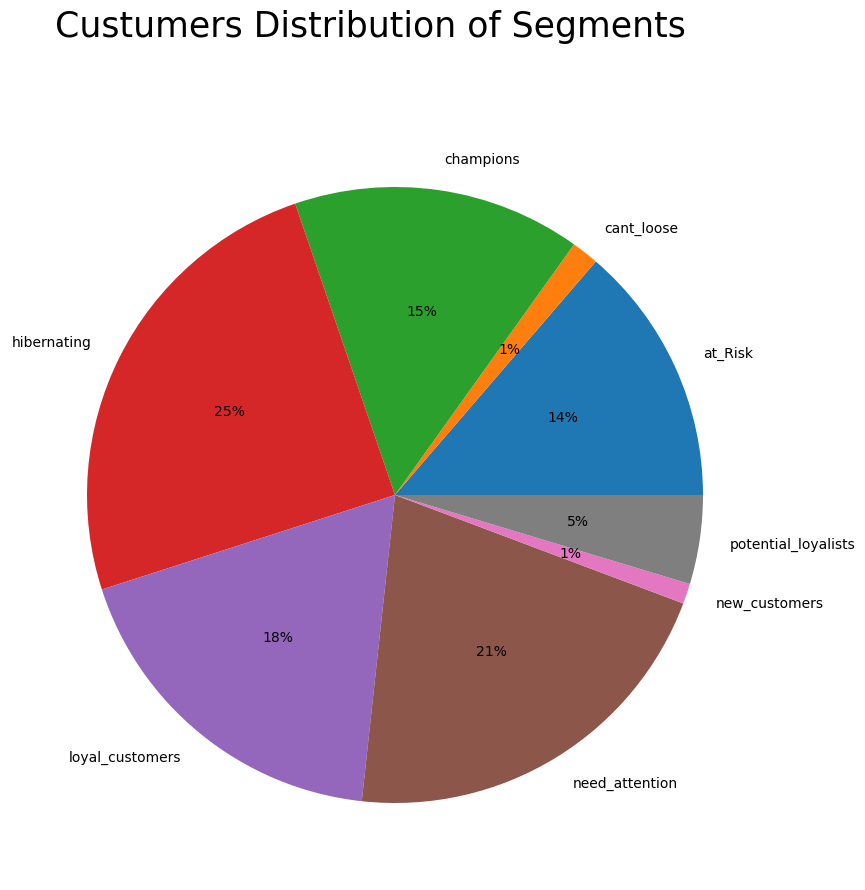

In [40]:
fig  = plt.figure(figsize = (20,10)).suptitle('Custumers Distribution of Segments', fontsize=25)
plt.pie(segments_count["count"], labels = segments_count["segment"], autopct='%.0f%%')

plt.show()

In [41]:
agg_list=["mean", "count", "max"]
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(agg_list)

recency             frequency                monetary  \
                           mean count  max       mean count  max         mean   
segment                                                                         
at_Risk              174.224283   593  395   2.878583   593    6   927.971622   
cant_loose           154.387097    62  394   8.338710    62   34  2641.932742   
champions             27.683969   655   36  12.164885   655  208  5798.493328   
hibernating          238.763551  1070  395   1.098131  1070    2   401.216683   
loyal_customers       55.171501   793   93   6.421185   793   61  2684.912158   
need_attention        62.343234   909   93   1.620462   909    3   585.461155   
new_customers         29.347826    46   36   1.000000    46    1   288.625652   
potential_loyalists   28.980198   202   36   2.103960   202    3   664.506634   

                                      
                    count        max  
segment                               
at_Risk               593   11072.67  
cant_loose             62   10254.18  
champions             655  261088.26  
hibernating          1070    9864.26  
loyal_customers       793  106904.05  
need_attention        909    6207.67  
new_customers          46     848.55  
potential_loyalists   202    3452.73

> There are **19% of Champions & Potential Loyalists** who make the most transactions 
> > Giving some extra discounts can help to retain them for a longer period

> Apparently,there is a segment of **21% which needs attentio**n to increase their frequency of transcation. This can be done by targeted campainging

# K-Means Clustering :

In [42]:
df_c=data.groupby('CustomerID').agg({ 'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,'InvoiceNo':'nunique'})
df_c.columns = ['recency', 'frequency']

In [43]:
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_c)
df_scaled
df_scaled = pd.DataFrame(df_scaled,columns=['recency','frequency'])
df_scaled["CustomerID"] = df_c.index
df_scaled = df_scaled.set_index("CustomerID",drop=True)

**Finding the optimal clusters using elbow method**

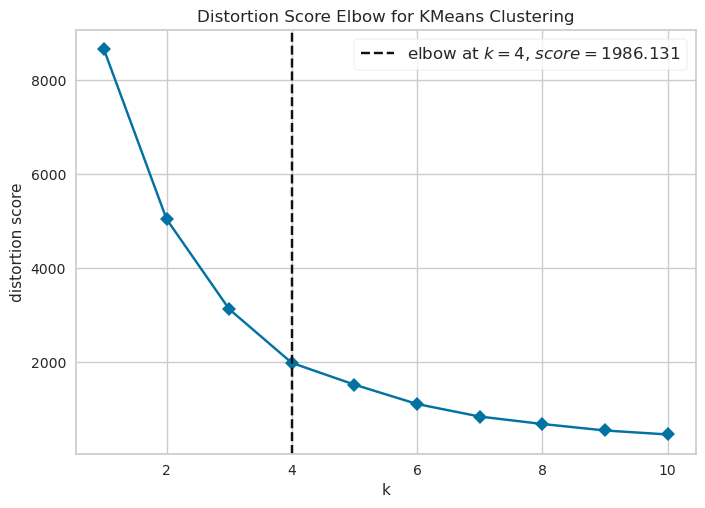

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_scaled)        
visualizer.show()        

In [45]:
kmeans = KMeans(n_clusters=4, n_init = 15, random_state=1)
kmeans.fit(df_scaled)
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = df_scaled.columns )
centroid_df

,recency,frequency
0,-0.480754,-0.100609
1,1.559092,-0.353054
2,-0.910102,16.302255
3,-0.804242,2.123605


<Figure size 1500x1500 with 0 Axes>

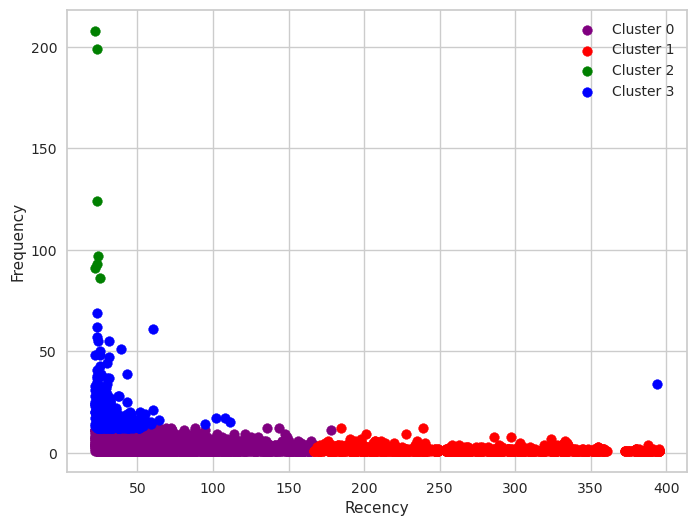

In [46]:
df_kmeans = df_c.copy()
df_kmeans['labels'] = kmeans.labels_.tolist()


colors = np.array(["blue", "purple","red","green"])
fig  = plt.figure(figsize = (15,15)).suptitle('Plot of Customer\'s Distribution', fontsize=25)
# Define colors for each label
label_colors = {0: 'purple', 1: 'red', 2: 'green', 3: 'blue'}

# Scatter plot
plt.figure(figsize=(8, 6))

for label, color in label_colors.items():
    label_data = df_kmeans[df_kmeans['labels'] == label]
    plt.scatter(label_data['recency'], label_data['frequency'], c=color, label=f'Cluster {label}')

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
agg_list=["mean", "count", "max",]
df_kmeans[["labels", "recency", "frequency"]].groupby("labels").agg(agg_list)

recency              frequency           
              mean count  max        mean count  max
labels                                              
0        66.060120  2994  178    3.484636  2994   12
1       269.961466  1064  395    1.563910  1064   12
2        23.142857     7   25  128.285714     7  208
3        33.724528   265  394   20.407547   265   69

**Cluster 0 - Potential Customers**

**Cluster 1 - Hiberanating Customers**

**Cluster 2 - Loyal Customers**

**Cluster 3 - Punctual One's**

In [48]:
df_c=data.groupby('CustomerID').agg({ 'GOV':'sum'})
df_c.columns = ['Expenditure']


In [49]:
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_c)
df_scaled
df_scaled = pd.DataFrame(df_scaled,columns=['Expenditure'])
df_scaled["CustomerID"] = df_c.index
df_scaled = df_scaled.set_index("CustomerID",drop=True)

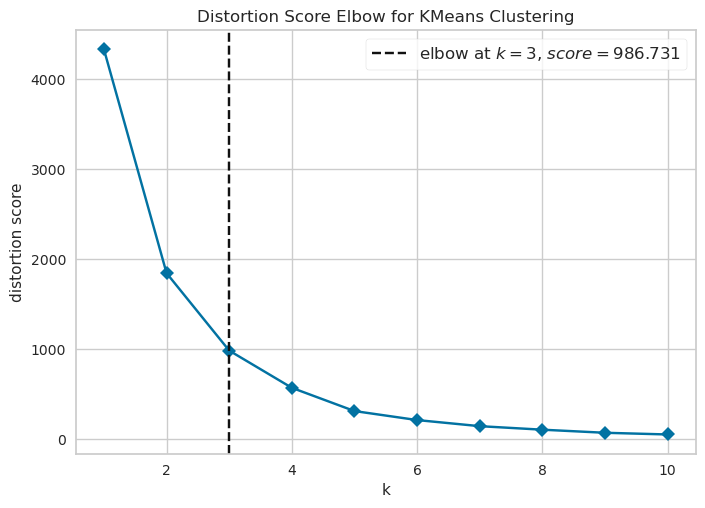

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_scaled)        
visualizer.show()    

In [51]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=1)
kmeans.fit(df_scaled)
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = df_scaled.columns )
centroid_df

,Expenditure
0,-0.058925
1,30.956860
2,7.368534


**Cluster 0 - Low Spenders**

**Cluster 1 - High Spenders**

**Cluster 2 - Med Spenders**

<Figure size 1500x1500 with 0 Axes>

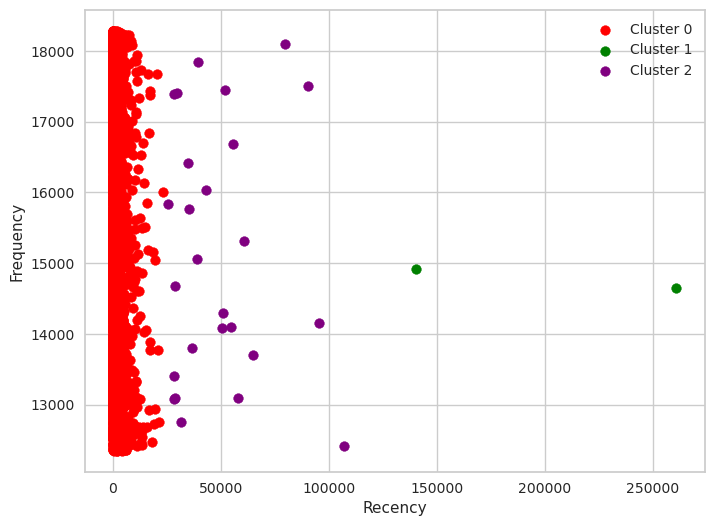

In [52]:
df_kmeans = df_c.copy()
df_kmeans['labels'] = kmeans.labels_.tolist()
df_kmeans.reset_index(inplace=True)

fig  = plt.figure(figsize = (15,15)).suptitle('Plot of Customer\'s Distribution', fontsize=25)
# Define colors for each label
label_colors = {0: 'red', 1: 'green', 2: 'purple'}

# Scatter plot
plt.figure(figsize=(8, 6))

for label, color in label_colors.items():
    label_data = df_kmeans[df_kmeans['labels'] == label]
    plt.scatter(label_data['Expenditure'], label_data['CustomerID'], c=color, label=f'Cluster {label}')

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()